## This file displays radar data taken at Mount Helmos during Storm Carmel during the CALISHTO campaign

In [1]:
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import datetime
import pickle
plt.rcParams['figure.facecolor']='white'
import matplotlib.dates as mdates
date_fmt = mdates.DateFormatter('%d-%m'+'\n'+ '%H:%M')

# Change this path
f = '/Users/eliotperrin/Desktop/Travail de bachelor/WProf_data/*ZEN_LV1*'

In [2]:
# This will loop on the files and store the datas in arrays

mdv_plot = None
Ze_plot = None
Rgates_plot =None
Spectral_width_plot = None

x_axis = np.array([])

for element in sorted(glob.glob(f)):
    nc = Dataset(element)
    dt = [datetime.datetime.utcfromtimestamp(tt) for tt in nc.variables['Time']]

    if dt[-1] < datetime.datetime(2021, 12, 17, 18):
        continue

    if dt[-1] > datetime.datetime(2021, 12, 19, 12):
        continue 
    
    mdv = nc.variables['Mean-velocity'][:]
    Ze = 10*np.log10(nc.variables['Ze'][:])#/nc.variables['Linear-sensitivity-vert'][:])
    SNR = 10*np.log10(nc.variables['Ze'][:]/nc.variables['Linear-sensitivity-vert'][:])
    mdv[SNR<26]=np.nan # This seems to be an appropriate threshold to filter out noise
    
    Rgates = nc.variables['Rgate'][:]/1000
    Spectral_width = nc.variables['Spectral-width'][:]
    # print(Spectral_width.shape)
    
    # test du snr
    #Ze.mask = SNR<-24
    Ze[SNR<30]=np.nan
    Spectral_width[SNR<26]= np.nan
    
    if mdv_plot is None:
        mdv_plot = mdv 
    else:
        mdv_plot = np.concatenate((mdv_plot, mdv), axis=0)  
    
    if Ze_plot is None:
        Ze_plot = Ze  
    else:
        Ze_plot = np.concatenate((Ze_plot, Ze), axis=0)  
    
    if Rgates_plot is None:
        Rgates_plot = Rgates  
    else:
        Rgates_plot = np.concatenate((Rgates_plot, Rgates), axis=0) 

    if Spectral_width_plot is None:
        Spectral_width_plot = Spectral_width
    else:
        Spectral_width_plot = np.concatenate((Spectral_width_plot, Spectral_width), axis=0) 
    
    
    x_axis = np.append(x_axis, dt)

#print(x_axis)

#print(mdv_plot.shape, x_axis.shape,Ze_plot.shape, Rgates_plot.shape, Spectral_width_plot.shape)


In [5]:
with open('/Users/eliotperrin/Desktop/Travail de bachelor/comparaison/variables.pkl', 'rb') as f:
    wrf_time_spin_up_end, ZZmiddle_1000, tCNT_T = pickle.load(f)


<a list of 6 text.Text objects>

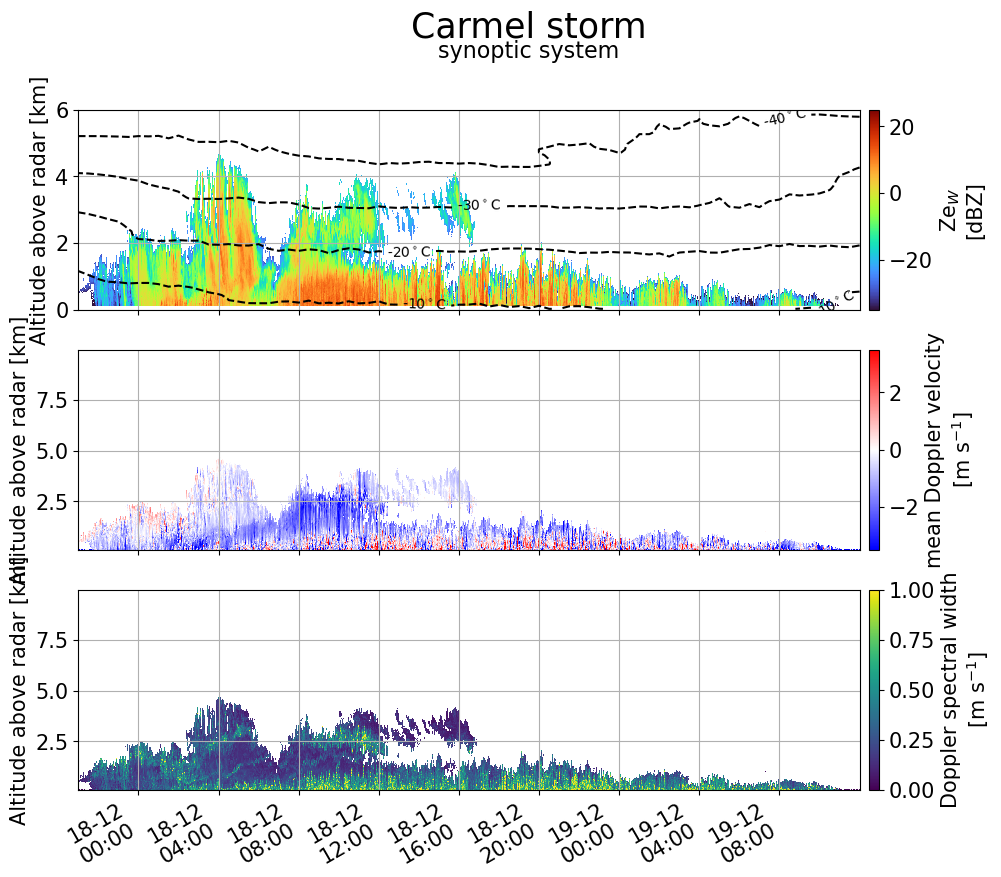

In [6]:
plt.rcParams['font.size']=15
fig,axs = plt.subplots(3,1,figsize=(12,10),sharex=True)
fig.suptitle('Carmel storm', fontsize=25)
fig.text(0.5, 0.95, 'synoptic system', fontsize=16, ha='center', va='top')
im0=axs[0].pcolormesh(x_axis,Rgates,Ze_plot.T,vmin=-35,vmax=25,cmap='turbo')
plt.colorbar(im0,label=r'Ze$_{W}$'+'\n[dBZ]',pad=.01,ax=axs[0])
im1=axs[1].pcolormesh(x_axis,Rgates,mdv_plot.T,vmin=-3.5,vmax=3.5,cmap='bwr')
plt.colorbar(im1,label=r'mean Doppler velocity'+'\n[m s$^{-1}$]',pad=.01,ax=axs[1])
im2=axs[2].pcolormesh(x_axis,Rgates,Spectral_width_plot.T,vmin=0,vmax=1,cmap='viridis')
plt.colorbar(im2,label=r'Doppler spectral width'+'\n[m s$^{-1}$]',pad=.01,ax=axs[2])
axs[0].set_ylabel('Altitude above radar [km]')
axs[1].set_ylabel('Altitude above radar [km]')
axs[2].set_ylabel('Altitude above radar [km]')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[2].xaxis.set_major_formatter(date_fmt)
axs[0].set_ylim(0,6)
fig.autofmt_xdate()


cs = axs[0].contour(wrf_time_spin_up_end,ZZmiddle_1000, (tCNT_T),levels=np.arange(-50, 0,10), colors='black')
axs[0].clabel(cs, inline=True,fontsize=10, fmt='%d$^\circ$C')